# Metrics exercise 2: Housing prices

You are a freelance data scientist who has been hired by a large real estate agency which is interested in predicting housing values based on location. They are interested in being able to automatically predict housing prices in a region given features such as the region's population, the median income of its residents, and so forth.

In order to build a baseline model as a proof of concept, you have decided to use the California Housing Dataset which can be accessed via scikit-learn:

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

dataset = fetch_california_housing()
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df['target'] = dataset['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Part 1: Analysis

### Questions:
1. Print out the 'DESCR' field of the dataset object `dataset` to view information about the California Housing dataset. Pick one feature that you would expect to affect housing prices. Do you expect that it would be positively or negatively correlated with housing prices?
2. Calculate the Spearman correlation $\rho$ of the feature you chose in question 1 with the target variable (housing prices). Does the value of $\rho$ support your hypothesis?
3.  Split the dataset into train and test datasets `X_train, X_test, y_train, y_test` using `sklearn.model_selection.train_test_split` with 20% test data.
4. Fit a Random Forest Regressor `regr` (`sklearn.ensemble.RandomForestRegressor`) on `X_train` and `y_train`. What are the $R^2$ and RMSE values for the trained model on the train and test data sets? Hint: Use `regr.score()` and `sklearn.metrics.mean_squared_error`. Make sure to calculate RMSE and not MSE!
5. Make a scatter plot of predicted vs. actual target values (housing prices) for the train and test set. Plot the train and test sets in the same figure, in different colors.
6. How are the $R^2$ and RMSE scores on the train and test sets reflected in the scatter plot? How well can we predict housing prices in a district?

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
#1.
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


I pick the 'AveRooms' feature. I expect this feature to be positively correlated with the target variable as the more a house has rooms, the more it is big so the more it should be expensive.

In [4]:
#2.
df[['AveRooms','target']].corr(method = 'spearman')

,AveRooms,target
AveRooms,1.000000,0.263367
target,0.263367,1.000000


We get a correlation of 0.26 which support our hypothesis from question 1.

In [5]:
#3.
X = df.drop(columns = ['target'])
y = df.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)


In [6]:
#4.
regr = RandomForestRegressor()
regr.fit(X_train,y_train)
y_pred_test = regr.predict(X_test)
y_pred_train = regr.predict(X_train)

In [7]:
regr.score(X_train,y_train)

0.9734660947479095

In [8]:
regr.score(X_test,y_test)

0.8064688223246649

In [9]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

0.5035920896869747

In [10]:
np.sqrt(mean_squared_error(y_train,y_pred_train))

0.18833466599295967

We get an R2 of 0.8 and a rmse of 0.5 for the test set

We get an R2 of 0.97 and a rmse of 0.18 for the train set

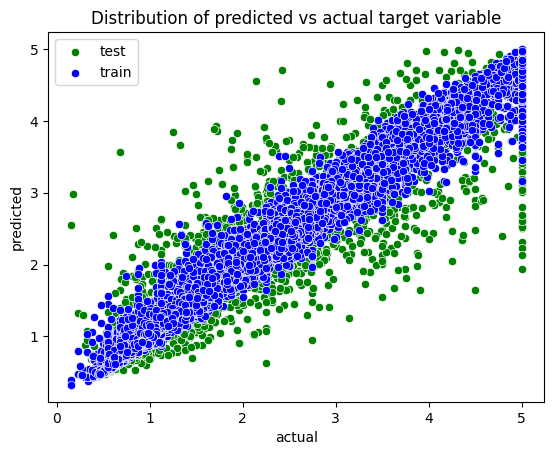

In [11]:
#5.
f,axes = plt.subplots(1,1)

sns.scatterplot(x = y_test, y = y_pred_test, label = 'test', color = 'green')
sns.scatterplot(x = y_train, y = y_pred_train, label = 'train', color = 'blue')
axes.set(title = 'Distribution of predicted vs actual target variable', xlabel = 'actual', ylabel = 'predicted')

plt.show()

6. We know that the test set has a higher rmse, which we can see on the plot as the green points are much more spreaded than the blue ones.
Blue points belongs much more to the x = y line.

In a district, as the rmse of the test set predictions is 0.5, it means that in general, when we predict housing prices in a district, we make an error of 0.5, which is quite high as the median of the target variable on the train set is 1.7985 so we predict quite bad housing prices.



In [12]:
y_train.median()

1.7985

## Part 2: Getting Down to Business

Now that you have your regression model trained, you must prepare a report for your boss to explain your findings. Your boss is an expert in real estate but not trained in data science, and you would like to present your results in an understandable fashion.

### Questions:
7. In explaining to your boss how well your regression model works, would you prefer to show her the $R^2$ score or the $RMS$ score of the model? Justify your answer.
8. During your meeting, your boss mentions that the final model cannot include Longitude or Latitude in its input features because the dataset only includes California while the final model will be used in Oregon. Re-train your model without these two features. How would you explain to your boss how the model's results have changed, mentioning either the $R^2$ or $RMSE$ score.

7. I would prefer to show the RMSE score as it has the same unit as our data.
Knowing the rmse, we know the error we make each time we estimate the price of a house so it will be more meaningful for him.

In [13]:
#8.
new_X_train = X_train.drop(columns = ['Latitude','Longitude'])
new_X_test = X_test.drop(columns = ['Latitude','Longitude'])

In [14]:
new_regr = RandomForestRegressor()
new_regr.fit(new_X_train,y_train)
new_y_pred_test = new_regr.predict(new_X_test)


In [15]:
new_regr.score(new_X_test,y_test)

0.676497199664648

In [16]:
np.sqrt(mean_squared_error(y_test,new_y_pred_test))

0.6510921394438105

The new rmse of our model is 0.65 so compared to before, in general, each time we want to predict the house price, we will make an error of 0.65, so an error greater than 0.15 compared to the previous model. Then, our model is less efficient than the previous one.